In [ ]:
!pip install tensorflow

In [ ]:
# importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


After importing necessary libraries, it is time to import the data. Fashion MNIST data already exsists in tensorflow.
The load_data() function in the keras.datasets.fashion_mnist module is specifically designed to return two tuples: one for the training data and one for the testing data.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


fashion_mnist.load_data() return us with two tupples (train_images, train_labels) and (test_images, test_labels). Both the tupples constitute of two tensors. So we have a total of 4 tensors now. Below is the shape of every tensor.

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The shape simply represents that we have 60,000 images in the training set and 10,000 images in the test set and each image is 28x28 pixels. If we take train_images as our example, one can imagine it to be a heap of 60,000 such 28x28 images stacked one over the other. train_images[0] captures the topmost image of the stack.
In the line where we are displaying the image, we have an additional argument of cmap = "gray". That is to ensure that the image produced is grey-scale.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

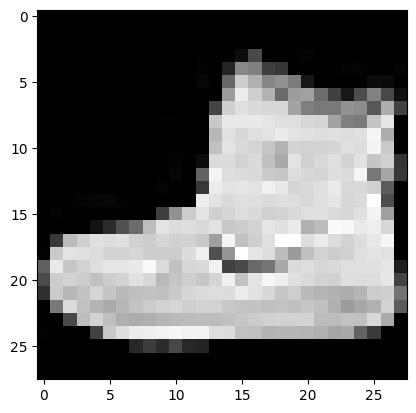

In [ ]:
print(train_labels[0])
print(train_images[0])
plt.imshow(train_images[0], cmap = 'gray')

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:





Label	Class
0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot


In [ ]:
class_names = ['Trouser', 'T-shirt', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Now, we have arrived to the Pre-Processing phase of our project. In preprocessing we normalize the image data by dividing all the pixel values by 255, as 255 is the maximum value a pixel can hold. We do so in order to bring all values of all pixels in range of (0,1). This helps in smoother computations.

In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

Once, we are done with pre-processing, we now move towards the core model building. Here we are going to stick to NNs but there exsist several models to serve the purpose.

We first take the image and flatten it. Flattening converts a 28x28 matrix into a single array of 28*28 = 784 elements. This array serves as our input to the Neral Networks. There is a hidden layer of 128 elements and the output layer similarly consists of 10 elements each representing a class of the image.

Input Layer (784 elements) -> Hidden Layer (128 neurons) -> Output Layer (10 neurons)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
    ])

Now we need to compile the model which mainly lists down the loss function we want to choose, which optimizer we want to train our model with and which metric to track while training. There are other optimizers as well such as rmsprop or standard gradient descent, but adam remains as a default choice for training a neural network.

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Now we train the model. Often we train our model with batches and also define the regularization parameter, but for now let's just stick to simple training with a default batch size of 32. In case you are wondering why just 1875 iterations ? We have about 60,000 images right ?
That is because the number is representing number of batches itearted through. 60,000/32 = 1875

In [ ]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.4988 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3775 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3109 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2787 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2653 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2570 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2458 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.23

Now, it's time to evaluate our model. While evaluating you might notice that  our model performs well on training data but poorly on test data. This is overfitting which can be fixed by implementing regularization or droupout or both.

In the context of model.evaluate, setting verbose=2 will display one line for the evaluation result without a progress bar, which can be useful for getting a quick summary of the results.
The model.evaluate function returns a tuple containing the loss value and the metric(s) specified during model compilation. By default, the primary metric is accuracy, but you can specify additional metrics when compiling the model.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3391 - accuracy: 0.8817 - 683ms/epoch - 2ms/step

Test accuracy: 0.8816999793052673


We create a tensor called predictions, which contains all the predicted classes of the test_images.

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


When we print the first prediction from the list we predictions, we recive the probabilities of every class. So we can see, the highest probability is of 9. We can use the arg_max to obtain the number with highest probabilty.

In [ ]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[5.8279568e-07 4.3439310e-10 2.4283695e-09 2.5024713e-11 2.4203802e-08
 4.7192769e-03 1.3502386e-05 3.9956984e-03 1.8953689e-07 9.9127066e-01]
9
9


Below is the code, just to visualize our predictions. Blue color corresponds to the argmax.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

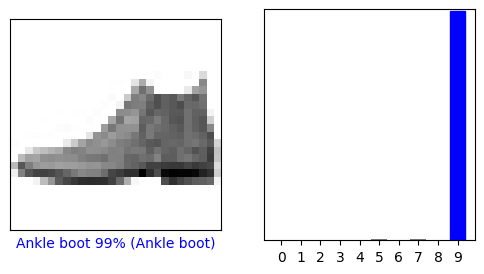

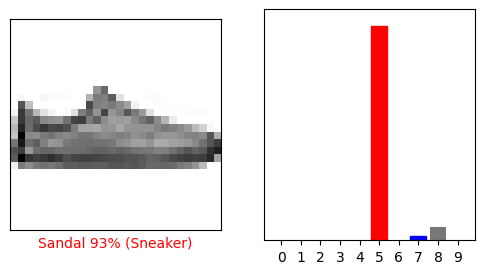

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()



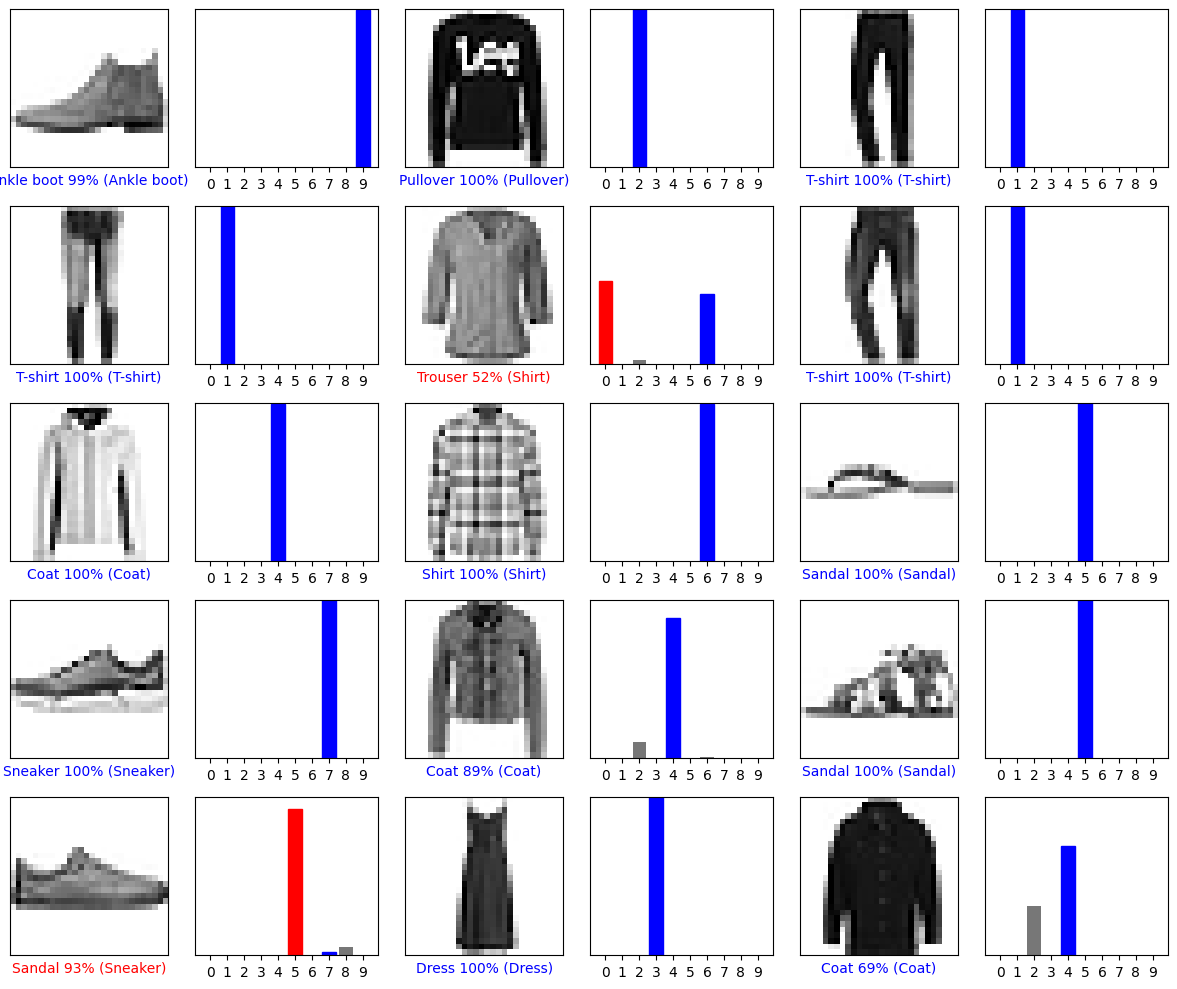

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Congratulations !
We have finished our project of Classifying Fashion MNIST Data